# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/ds4e/EDA`
### Do Q1 and two other questions.

**Q1.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
3. Show that $\text{cov}(a+bX,a+bX) = b^2 \text{cov}(X,X) $, and in particular that $\text{cov}(X,X) = s^2 $.
4. Instead of the mean, consider the median. Consider transformations that are non-decreasing (if $x\ge x'$, then $g(x)\ge g(x')$), like $2+5 \times X$ or $\text{arcsinh}(X)$. Is a non-decreasing transformation of the median the median of the transformed variable? Explain. Does your answer apply to any quantile? The IQR? The range? 
5. Consider a non-decreasing transformation $g()$. Is is always true that $m(g(X))= g(m(X))$?

**Q2.** This question looks at financial transfers from foreign entities to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going? For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `./data/ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. Create a kernel density plot of the log of `Foreign Gift Amount`, and then a kernel density plot of the log of `Foreign Gift Amount` conditional on gift type. Do you notice any patterns?
5. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
6. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions. 
7. Which giftors provide the most money, in total?

In [115]:
import pandas as pd
import numpy as np

#1
data = './data/ForeignGifts_edu.csv'
df = pd.read_csv(data)
df.head()


,ID,OPEID,Institution Name,City,State,Foreign Gift Received Date,Foreign Gift Amount,Gift Type,Country of Giftor,Giftor Name
0,1,102000,Jacksonville State University,Jacksonville,AL,43738,250000,Monetary Gift,CHINA,NaN
1,2,104700,Troy University,Troy,AL,43592,463657,Contract,CHINA,Confucius Institute Headquarters
2,3,105100,University of Alabama,Tuscaloosa,AL,43466,3649107,Contract,ENGLAND,Springer Nature Customer Service Ce
3,4,105100,University of Alabama,Tuscaloosa,AL,43472,1000,Contract,SAUDI ARABIA,Saudi Arabia Education Mission
4,5,105100,University of Alabama,Tuscaloosa,AL,43479,49476,Contract,SAUDI ARABIA,Saudi Arabia Education Mission


Mean:  10.512106806026068
Median:  11.462589606831122
Mode:  0    4.60517
Name: Foreign Gift Amount, dtype: float64


/Users/iankariuki/Library/Python/3.9/lib/python/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


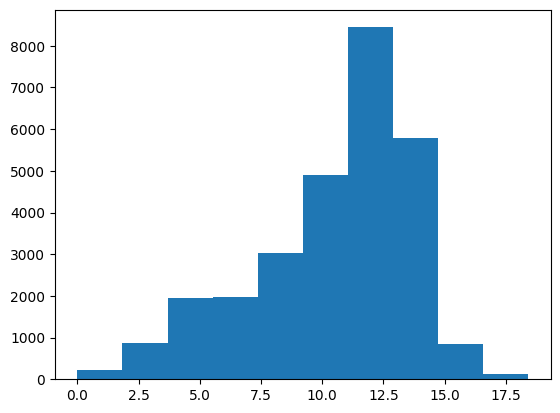

In [116]:
#2 - For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.

hist = df['Foreign Gift Amount']
#FGA = np.arcsinh(hist)
FGA = np.log(hist)
FGA.hist(grid=False)
print('Mean: ', FGA.mean() )
print('Median: ', FGA.median() )
print('Mode: ', FGA.mode() )

#The histogram is skewed to the left meaning the median is higher than the mean. Donors that appear
#in the dataset seem to more frequently give larger amounts of money.  This may be because donors tend to give larger amounts rather than
#small amounts if it is a one time gift

Gift Type
Contract         0.612097
Monetary Gift    0.387513
Real Estate      0.000390
dtype: float64

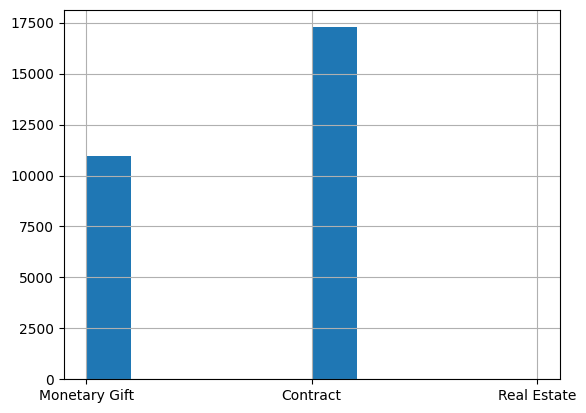

In [117]:
#3 - For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?

hist = df['Gift Type'].hist()
gt = df.groupby('Gift Type').size()

gt_prop = gt/gt.sum()
gt_prop




/Users/iankariuki/Library/Python/3.9/lib/python/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/_k/nmdylgh9193b187p5shr4z180000gn/T/ipykernel_69290/1423487090.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(logkd, shade=True, color="blue").set(title = "KDE of F")


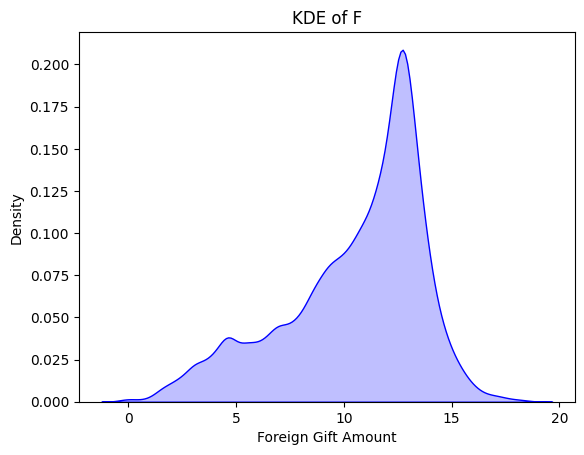

/var/folders/_k/nmdylgh9193b187p5shr4z180000gn/T/ipykernel_69290/1423487090.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df,x =logkd, hue="Gift Type", shade=True).set(title = "KDE of Log Foreign Gift Amount ")


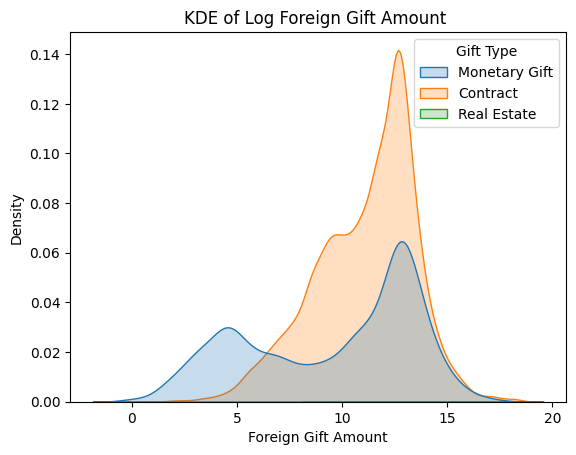

In [118]:
#4 - Create a kernel density plot of the log of `Foreign Gift Amount`, and then a kernel density plot of the log of `Foreign Gift Amount` conditional on gift type. Do you notice any patterns?
import seaborn as sns
import matplotlib.pyplot as plt


logkd = np.log(df['Foreign Gift Amount'])



sns.kdeplot(logkd, shade=True, color="blue").set(title = "KDE of F")
plt.show()

sns.kdeplot(data=df,x =logkd, hue="Gift Type", shade=True).set(title = "KDE of Log Foreign Gift Amount ")
plt.show()


There seems to be an increase in frequency of donations as the amount given increases as it pertains to Contract Giving. The Monetary seems to have two peaks, maybe more people frequently give a certain amount from rounding up or down to a cleaner number.

In [168]:
#5 pt.1 - What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
numgifts = df.groupby(["Country of Giftor"]).size().nlargest(15)
print("The top 15 countries in terms of the number of gifts are\n",numgifts)

#other half of the problem is in the code chunk below this one

The top 15 countries in terms of the number of gifts are
 Country of Giftor
ENGLAND            3655
CHINA              2461
CANADA             2344
JAPAN              1896
SWITZERLAND        1676
SAUDI ARABIA       1610
FRANCE             1437
GERMANY            1394
HONG KONG          1080
SOUTH KOREA         811
QATAR               693
THE NETHERLANDS     512
KOREA               452
INDIA               434
TAIWAN              381
dtype: int64
The top 15 countries with the most amount given is
 Country of Giftor
QATAR                   2706240869
ENGLAND                 1464906771
CHINA                   1237952112
SAUDI ARABIA            1065205930
BERMUDA                  899593972
CANADA                   898160656
HONG KONG                887402529
JAPAN                    655954776
SWITZERLAND              619899445
INDIA                    539556490
GERMANY                  442475605
UNITED ARAB EMIRATES     431396357
FRANCE                   405839396
SINGAPORE                4

In [169]:
#Q5 pt.2

amountgiven = df.groupby("Country of Giftor")["Foreign Gift Amount"].sum().nlargest(15)
print("The top 15 countries with the most amount given is\n",amountgiven)

The top 15 countries with the most amount given is
 Country of Giftor
QATAR                   2706240869
ENGLAND                 1464906771
CHINA                   1237952112
SAUDI ARABIA            1065205930
BERMUDA                  899593972
CANADA                   898160656
HONG KONG                887402529
JAPAN                    655954776
SWITZERLAND              619899445
INDIA                    539556490
GERMANY                  442475605
UNITED ARAB EMIRATES     431396357
FRANCE                   405839396
SINGAPORE                401157692
AUSTRALIA                248409202
Name: Foreign Gift Amount, dtype: int64


In [179]:
#6 pt.1-  What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions. 
topreceived = df.groupby("Institution Name")["Foreign Gift Amount"].sum().nlargest(15)
topreceived

Institution Name
Carnegie Mellon University                       1477922504
Cornell University                               1289937761
Harvard University                                954803610
Massachusetts Institute of Technology             859071692
Yale University                                   613441311
Texas A&M University                              521455050
Johns Hopkins University                          502409595
Northwestern University                           402316221
Georgetown University                             379950511
University of Chicago (The)                       364544338
University of Colorado Boulder                    360173159
Duke University                                   343699498
Brigham Young University                          323509863
Stanford University                               319561362
University of Texas MD Anderson Cancer Center     301527419
Name: Foreign Gift Amount, dtype: int64

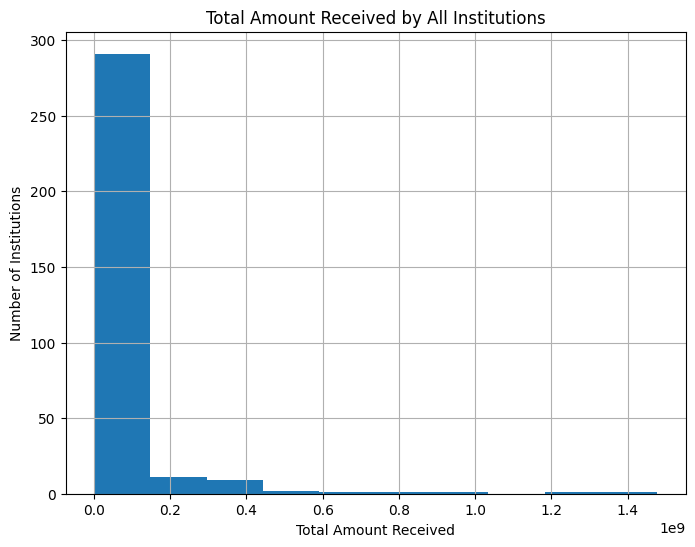

In [186]:
#6 pt.2
allInstitutions = df.groupby("Institution Name")["Foreign Gift Amount"].sum()
plt.figure(figsize=(8,6))
plt.hist(allInstitutions, bins=10)
plt.xlabel("Total Amount Received")
plt.ylabel("Number of Institutions")
plt.title("Total Amount Received by All Institutions")
plt.grid(True)
plt.show()

In [192]:
#7 - Which giftors provide the most money, in total?

giftorprovided = df.groupby("Giftor Name")["Foreign Gift Amount"].sum().nlargest(5)
print("The giftors that provided the most money is\n",giftorprovided)

The giftors that provided the most money is
 Giftor Name
Qatar Foundation                       1166503744
Qatar Foundation/Qatar National Res     796197000
Qatar Foundation for Education          373945215
Anonymous                               338793629
Saudi Arabian Cultural Mission          275221475
Name: Foreign Gift Amount, dtype: int64


**Q3.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. This provides a dataset of AirBnB rental properties for New York City.  
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

In [202]:
#1 Load the `./data/airbnb_hw.csv` data with Pandas. This provides a dataset of AirBnB rental properties for New York City.

data = '/Users/iankariuki/UVADS/Machine-Learning1/hw/EDA/assignment/data/airbnb_hw.csv'

df = pd.read_csv(data)
df.head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [200]:
#2 What are are the dimensions of the data? How many observations are there? What are the variables included? 
# Use `.head()` to examine the first few rows of data.

df.shape


(30478, 13)

#2
There are 30478 rows and 13 columns. The rows represent the total amount of observations and the columns represent the variables.

In [203]:
#3 Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? 
# For which kinds of properties are private rooms more common than renting the entire property?

pd.crosstab(df["Room Type"],df["Property Type"])

Property Type,Apartment,Bed & Breakfast,Boat,Bungalow,Cabin,Camper/RV,Castle,Chalet,Condominium,Dorm,House,Hut,Lighthouse,Loft,Other,Tent,Townhouse,Treehouse,Villa
Room Type,,,,,,,,,,,,,,,,,,,
Entire home/apt,15669,13,7,4,1,6,0,0,72,4,752,0,1,392,14,0,83,0,4
Private room,10748,155,1,0,1,1,1,1,22,16,1258,2,0,312,29,4,52,1,4
Shared room,685,12,0,0,0,0,0,0,0,11,80,0,0,49,4,0,1,3,0


Apartments seem to be the most common property type that is offered, then house, loft, and townhouse. Houses typically offer a private room as well as Bed 
& Loft. The fact that there is a castle is kinda cool as well as a light house. Is less common for a property to offer a shared room, which makes sense considering that people would like some sort of privacy when being vulnerable in a place that isn't their's.

<Axes: >

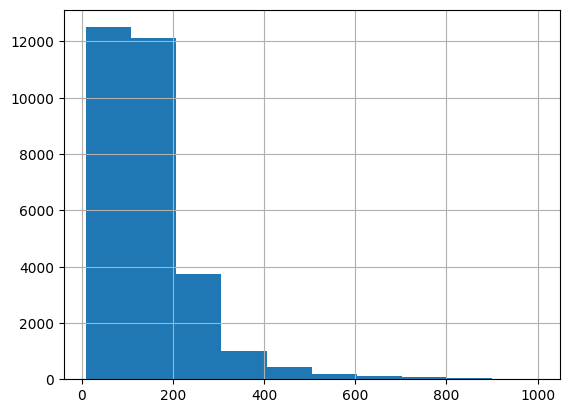

In [228]:
#4 pt.1 For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? 

df["Price"]= pd.to_numeric(df["Price"], errors="coerce")
price = df["Price"]

price.hist()


<Axes: ylabel='Density'>

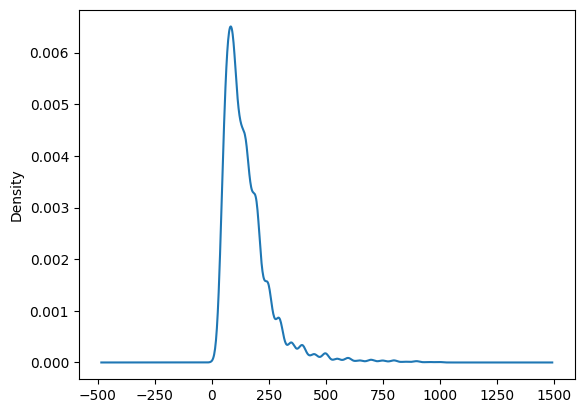

In [227]:
price.plot.density()


<Axes: >

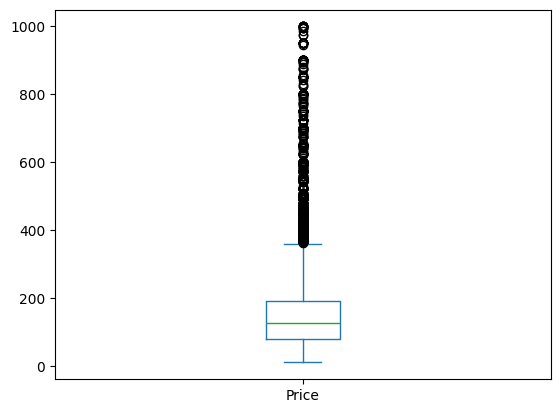

In [229]:
price.plot.box()

There are many outliers, it is especially clear in the box plot.

<Axes: >

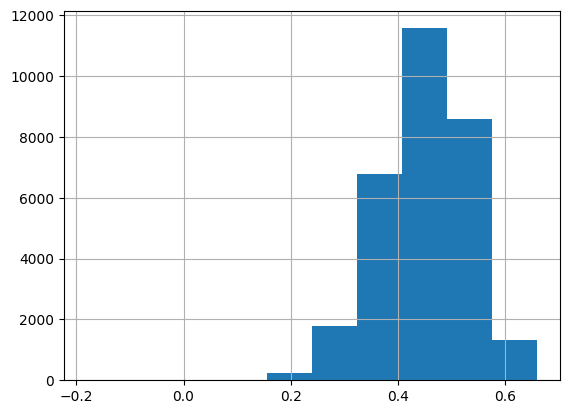

In [254]:
#4 pt.2 # Use `log` to transform price into a new variable, `price_log`, and take these steps again.

df["price_log"] = np.log(price)
price_log = df["price_log"]
price_log.hist()

<Axes: ylabel='Density'>

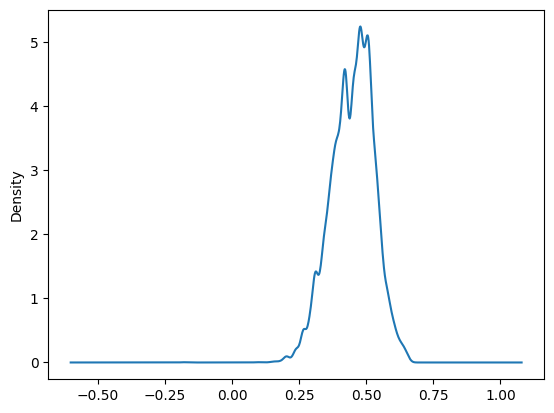

In [255]:
price_log.plot.density()

<Axes: >

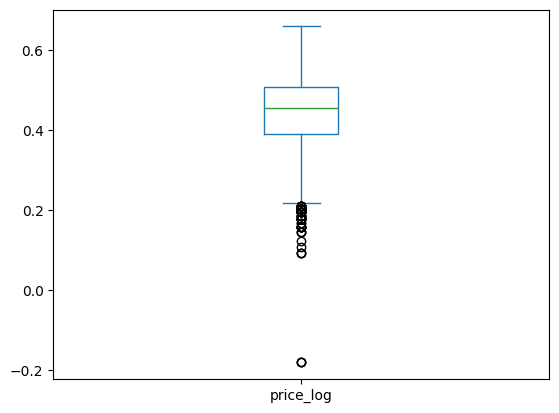

In [256]:
price_log.plot.box()

In [257]:
price_log.describe()

count    30297.000000
mean         0.448212
std          0.079545
min         -0.181483
25%          0.390359
50%          0.453936
75%          0.506610
max          0.658814
Name: price_log, dtype: float64

<Axes: xlabel='Beds', ylabel='price_log'>

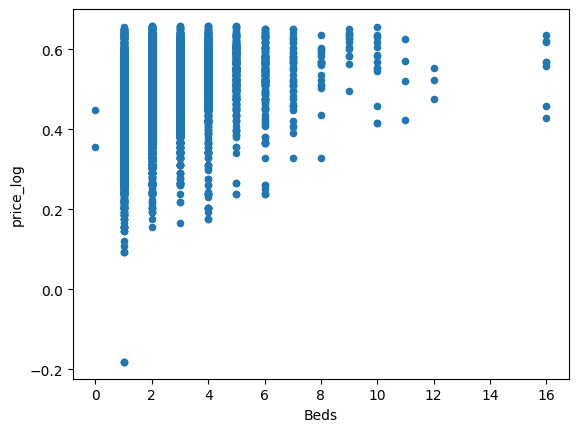

In [265]:
#5 pt.1 Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. 

df.columns.tolist()
df.plot.scatter(x="Beds",y="price_log")

As the number of beds increase, the price of tends to increase



In [264]:
#5 pt.2 Describe any patterns you see in the average price and standard deviation in prices.

descript = df.groupby("Beds")["Price"].describe()
descript

,count,mean,std,min,25%,50%,75%,max
Beds,,,,,,,,
0.0,2.0,92.000000,38.183766,65.0,78.50,92.0,105.50,119.0
1.0,20307.0,124.757670,75.685752,10.0,75.00,100.0,155.00,950.0
2.0,6561.0,186.702332,115.044205,25.0,115.00,160.0,225.00,999.0
3.0,2029.0,234.928043,142.288189,26.0,140.00,200.0,299.00,999.0
4.0,766.0,280.554830,175.512312,27.0,150.00,240.0,363.75,999.0
5.0,274.0,322.000000,190.319415,35.0,186.00,285.0,425.00,995.0
6.0,166.0,316.313253,201.157585,35.0,183.75,271.0,399.00,900.0
7.0,45.0,341.377778,220.116631,55.0,177.00,300.0,445.00,900.0
8.0,20.0,331.850000,155.652202,55.0,218.75,339.5,408.75,750.0


As the number of beds offered increases, the average price of the room tends to increases alongside the standard deviation until it reaches 9 rooms, then 
it tends to subside. This may be because one, there are comparatively very observations of greater than 7 rooms, and that these would probably be cheaper, 
less luxurious properties like cabins.

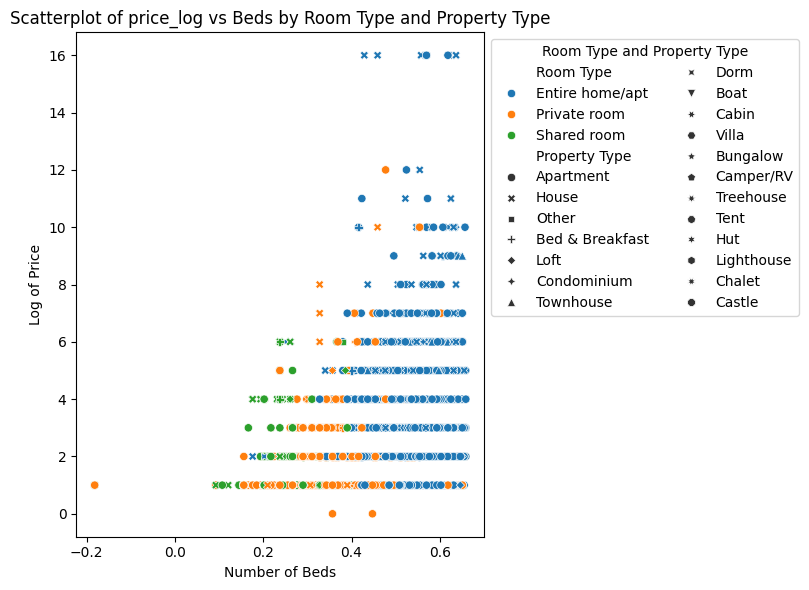

In [286]:
#6 pt.1 Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? 
plt.figure(figsize=(8,6))
sns.scatterplot(data=df,x ="price_log",y="Beds", hue="Room Type", style="Property Type", legend = "full").set(title = "Comparing Price Log to Beds")
plt.title('Scatterplot of price_log vs Beds by Room Type and Property Type')
plt.xlabel('Number of Beds')
plt.ylabel('Log of Price')
plt.legend(title='Room Type and Property Type', bbox_to_anchor=(1, 1), loc='upper left', ncol=2)
plt.tight_layout()
plt.show()

Most of the offerings with greater number of beds are apartments that offer the entire property, then second seemingly is apartments that offer private rooms, then the least is the shared room. The most expensive offered are houses and apartments with a comparatively large amount of Beds.

In [301]:
#6 pt.2 Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? 

descript = df.groupby(["Room Type","Property Type"])["Price"].describe()
descript.sort_values("mean", ascending = False).head(15)

count        mean         std    min  \
Room Type       Property Type                                             
Entire home/apt Other               10.0  290.800000  273.526273   66.0   
                Loft               379.0  284.910290  184.515517   55.0   
                Condominium         71.0  281.126761  175.313998   80.0   
                Cabin                1.0  250.000000         NaN  250.0   
                Townhouse           81.0  242.037037  166.755243   66.0   
                House              723.0  234.554633  159.785974   27.0   
                Villa                3.0  206.333333   89.667906  120.0   
                Apartment        15550.0  200.210161  109.967435   10.0   
                Bed & Breakfast     13.0  184.538462  119.814172   85.0   
Private room    Other               28.0  176.642857  141.484252   39.0   
Shared room     Treehouse            3.0  167.666667  114.788211   95.0   
Entire home/apt Boat                 7.0  158.428571   51.110524  100.0   
                Bungalow             4.0  150.750000   46.464144   87.0   
Private room    Castle               1.0  150.000000         NaN  150.0   
Shared room     Other                4.0  148.750000  134.806961   70.0   

                                    25%    50%     75%    max  
Room Type       Property Type                                  
Entire home/apt Other            123.75  177.5  350.00  850.0  
                Loft             160.00  220.0  350.00  985.0  
                Condominium      155.00  200.0  360.00  850.0  
                Cabin            250.00  250.0  250.00  250.0  
                Townhouse        135.00  189.0  295.00  900.0  
                House            125.00  188.0  299.00  950.0  
                Villa            160.00  200.0  249.50  299.0  
                Apartment        135.00  175.0  230.00  999.0  
                Bed & Breakfast  121.00  130.0  220.00  525.0  
Private room    Other             80.00  114.0  200.00  500.0  
Shared room     Treehouse        101.50  108.0  204.00  300.0  
Entire home/apt Boat             122.50  150.0  182.00  250.0  
                Bungalow         133.50  160.5  177.75  195.0  
Private room    Castle           150.00  150.0  150.00  150.0  
Shared room     Other             73.75   87.5  162.50  350.0

when the room type is (Homes and apartments) that offer the entire property and are considered other, loft, condominium, cabin, and townhouse are the most
costly on average.

In [303]:
#6 pt.3 Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
descript.sort_values("std", ascending = False).head(15)

count        mean         std    min  \
Room Type       Property Type                                             
Entire home/apt Other               10.0  290.800000  273.526273   66.0   
Shared room     Bed & Breakfast     12.0  143.666667  245.328104   30.0   
Entire home/apt Loft               379.0  284.910290  184.515517   55.0   
                Condominium         71.0  281.126761  175.313998   80.0   
                Townhouse           81.0  242.037037  166.755243   66.0   
                House              723.0  234.554633  159.785974   27.0   
Private room    Other               28.0  176.642857  141.484252   39.0   
Shared room     Other                4.0  148.750000  134.806961   70.0   
Entire home/apt Bed & Breakfast     13.0  184.538462  119.814172   85.0   
Shared room     Treehouse            3.0  167.666667  114.788211   95.0   
Entire home/apt Apartment        15550.0  200.210161  109.967435   10.0   
                Camper/RV            6.0  114.333333  107.685963   45.0   
Private room    Tent                 4.0  126.250000   94.989034   40.0   
Entire home/apt Villa                3.0  206.333333   89.667906  120.0   
Shared room     Loft                49.0   78.816327   87.521824   30.0   

                                    25%    50%    75%    max  
Room Type       Property Type                                 
Entire home/apt Other            123.75  177.5  350.0  850.0  
Shared room     Bed & Breakfast   42.50   65.0   81.0  900.0  
Entire home/apt Loft             160.00  220.0  350.0  985.0  
                Condominium      155.00  200.0  360.0  850.0  
                Townhouse        135.00  189.0  295.0  900.0  
                House            125.00  188.0  299.0  950.0  
Private room    Other             80.00  114.0  200.0  500.0  
Shared room     Other             73.75   87.5  162.5  350.0  
Entire home/apt Bed & Breakfast  121.00  130.0  220.0  525.0  
Shared room     Treehouse        101.50  108.0  204.0  300.0  
Entire home/apt Apartment        135.00  175.0  230.0  999.0  
                Camper/RV         49.00   74.0  114.0  325.0  
Private room    Tent              58.75  107.5  175.0  250.0  
Entire home/apt Villa            160.00  200.0  249.5  299.0  
Shared room     Loft              43.00   50.0   78.0  525.0

Entire home/apt that are of property type "other" seems to have the highest standard deviation. Since the standard deviations here are high, it would be
better to use the median. The high standard deviation indicates that there is a large spread in the data, meaning that the mean would be very suseptible to 
outliers. Therefore, we should use the median, which handles large spreads much better than the mean.


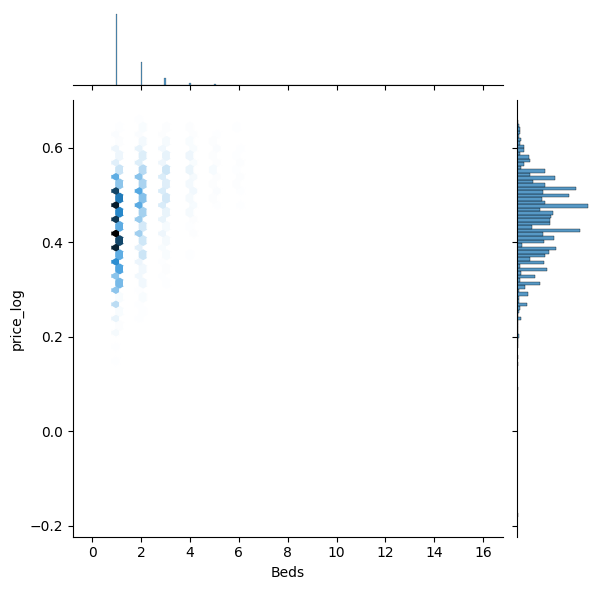

In [ ]:
#7 We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed?
#  How does it affect the way you think about the plots in 5 and 6?

sns.jointplot(x='Beds', y='price_log', data=df, kind='hex')
plt.show()

There is a high concentration of data in where there is 2 or less beds offered, and the log price seems to be heavily in the .4ish range. In this plot we can see the distribution of the price log, which questions 5 and 6 wouldn't as easily communicate to me.

**Q4.** This question looks at a time series of the number of active oil drilling rigs in the United States over time. The data comes from the Energy Information Agency.

1. Load `./data/drilling_rigs.csv` and examine the data. How many observations? How many variables? Are numeric variables correctly read in by Pandas, or will some variables have to be typecast/coerced? Explain clearly how these data need to be cleaned.
2. To convert the `Month` variable to an ordered datetime variable, use `df['time'] = pd.to_datetime(df['Month'], format='mixed')`.
3. Let's look at `Active Well Service Rig Count (Number of Rigs)`, which is the total number of rigs over time. Make a line plot of this time series. Describe what you see.
4. Instead of levels, we want to look at change over time. Compute the first difference of  `Active Well Service Rig Count (Number of Rigs)` and plot it over time. Describe what you see.
5. The first two columns are the number of onshore and offshore rigs, respectively. Melt these columns and plot the resulting series.